# 1. 데이터 전처리

In [ ]:
import pandas as pd
import numpy as np

train=pd.read_csv('/content/train.csv')
test=pd.read_csv('/content/test.csv')
submit=pd.read_csv('/content/submission.csv')


In [ ]:

train=train.drop(['time'],axis=1)
test=test.drop(['time'],axis=1)

train['date']=pd.to_datetime(train['date'])
test['date']=pd.to_datetime(test['date'])

#datetime항목의 유형을 datetime으로 바꿔줌

train

,store_id,date,card_id,amount,installments,days_of_week,holyday
0,0,2016-12-14,d297bba73f,5,NaN,2,0
1,0,2016-12-14,d297bba73f,-5,NaN,2,0
2,0,2016-12-19,0880849c05,144,NaN,0,0
3,0,2016-12-19,8b4f9e0e95,66,NaN,0,0
4,0,2016-12-19,7ad237eed0,24,NaN,0,0
...,...,...,...,...,...,...,...
3362791,1799,2018-07-19,e254bf70d9,600,NaN,3,0
3362792,1799,2018-07-19,8f41c89891,275,NaN,3,0
3362793,1799,2018-07-22,aeb64fe1fb,350,NaN,6,0
3362794,1799,2018-07-25,57932602d6,300,NaN,2,0


In [ ]:
train['date']=pd.to_datetime(train['date'])
test['date']=pd.to_datetime(test['date'])

#datetime항목의 유형을 datetime으로 바꿔줌
train.dtypes

store_id                 int64
date            datetime64[ns]
card_id                 object
amount                   int64
installments           float64
days_of_week             int64
holyday                  int64
dtype: object

In [ ]:
print(train.isna().sum())

train=train.fillna(0) #할부개월 0인 경우가 일시불을 의미하므로 nan값을 0으로 채움
test=test.fillna(0)

print(train.isna().sum()) #제대로 채워졌는지 확인

store_id              0
date                  0
card_id               0
amount                0
installments    3345936
days_of_week          0
holyday               0
dtype: int64
store_id        0
date            0
card_id         0
amount          0
installments    0
days_of_week    0
holyday         0
dtype: int64


In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
train['card_id']=le.fit_transform(train['card_id'])
test['card_id']=le.fit_transform(test['card_id'])
test

,store_id,date,card_id,amount,installments,days_of_week,holyday
0,0,2016-08-01,160491,125,0.0,0,0
1,0,2016-08-01,102181,90,0.0,0,0
2,0,2016-08-01,93301,150,0.0,0,0
3,0,2016-08-01,117048,362,0.0,0,0
4,0,2016-08-01,89065,125,0.0,0,0
...,...,...,...,...,...,...,...
473387,199,2018-03-30,40383,65,0.0,4,0
473388,199,2018-03-30,49235,65,0.0,4,0
473389,199,2018-03-30,38305,65,0.0,4,0
473390,199,2018-03-30,29370,200,0.0,4,0


In [ ]:
print(train.dtypes)
print(test.dtypes)
print(train[train['amount']<0])

store_id                 int64
date            datetime64[ns]
card_id                  int64
amount                   int64
installments           float64
days_of_week             int64
holyday                  int64
dtype: object
store_id                 int64
date            datetime64[ns]
card_id                  int64
amount                   int64
installments           float64
days_of_week             int64
holyday                  int64
dtype: object
         store_id       date  card_id  ...  installments  days_of_week  holyday
1               0 2016-12-14   758668  ...           0.0             2        0
111             0 2016-12-20   333909  ...           0.0             1        0
155             0 2016-12-21   366635  ...           3.0             2        0
165             0 2016-12-21   217203  ...           0.0             2        0
169             0 2016-12-21   217203  ...           0.0             2        0
...           ...        ...      ...  ...           ...  

# 2. 데이터 시각화

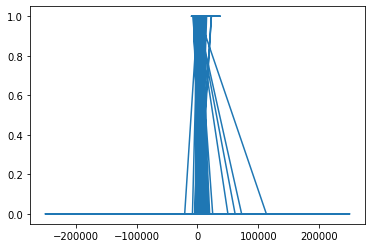

In [ ]:
import matplotlib.pyplot as plt
plt.plot(train['amount'],train['holyday'])

### [평일과 휴일 카드거래액 비교]

In [ ]:
#평일의 평균과 휴일의 평균 비교하기 (amount값 참고)
train.groupby(['holyday']).mean()['amount']
#휴일이 평일에 있을 가능성이 높기 때문인 듯 함

holyday
0    146.476094
1    134.881488
Name: amount, dtype: float64

### [요일별 비교]

In [ ]:
#요일별 평균 비교하기
train.groupby(['days_of_week']).mean()['amount']
#결과를 통해 목요일과 금요일의 카드 거래액이 많음을 알 수 있음

days_of_week
0    143.199131
1    148.230134
2    149.429079
3    150.447155
4    150.952690
5    146.961930
6    131.532084
Name: amount, dtype: float64